<a href="https://colab.research.google.com/github/JoaoConrado/IA/blob/main/mountaincar_joao_rna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libs

In [ ]:
!pip install stable-baselines3
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from stable_baselines3 import DQN # This import should now work
from stable_baselines3.common.env_util import make_vec_env
import gym
import io
import base64
import glob
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 21.4 MB/s eta 0:00:00


Train test e BD

In [ ]:
# Carregar o dataset
novo_dados_path = '/content/sample_data/BD_MontainCar.csv'
novo_dados = pd.read_csv(novo_dados_path)

# Remover colunas desnecessárias
novo_dados = novo_dados.drop(columns=["Unnamed: 0"])

# Separar previsores e classes
novo_previsores = novo_dados[['Posicao', 'Velocidade']]
novo_classe = novo_dados['Acao']

# Normalizar os previsores
novo_scaler = MinMaxScaler()
novo_previsores = novo_scaler.fit_transform(novo_previsores)

# Dividir dados em treino e teste
novo_previsores_treinamento, novo_previsores_teste, novo_classe_treinamento, novo_classe_teste = train_test_split(
    novo_previsores, novo_classe, test_size=0.30, random_state=42
)


Modelo

In [ ]:
# Criar o modelo
novo_classificador = Sequential()
novo_classificador.add(Dense(units=8, input_dim=2, kernel_initializer='random_uniform', activation='relu'))
novo_classificador.add(Dropout(0.2))
novo_classificador.add(Dense(units=4, kernel_initializer='random_uniform', activation='relu'))
novo_classificador.add(Dropout(0.2))
novo_classificador.add(Dense(units=3, kernel_initializer='random_uniform', activation='softmax'))

novo_classificador.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinar o modelo
novo_classificador.fit(
    novo_previsores_treinamento, novo_classe_treinamento,
    validation_split=0.2, batch_size=15, epochs=150, callbacks=[early_stopping]
)


Epoch 1/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3649 - loss: 1.0982 - val_accuracy: 0.4323 - val_loss: 1.0951
Epoch 2/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3493 - loss: 1.0968 - val_accuracy: 0.4323 - val_loss: 1.0873
Epoch 3/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3471 - loss: 1.0903 - val_accuracy: 0.4323 - val_loss: 1.0643
Epoch 4/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3831 - loss: 1.0634 - val_accuracy: 0.4323 - val_loss: 1.0174
Epoch 5/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.3880 - loss: 1.0296 - val_accuracy: 0.5546 - val_loss: 0.9534
Epoch 6/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5088 - loss: 0.9778 - val_accuracy: 0.6638 - val_loss: 0.8866
Epoch 7/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5742 - loss: 0.9186 - val_accuracy: 0.6769 - val_loss: 0.8234
Epoch 8/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5899 - loss: 0.8786 - val_accuracy: 0.685

Metricas

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.2513 
Acurácia no conjunto de teste: 0.95
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


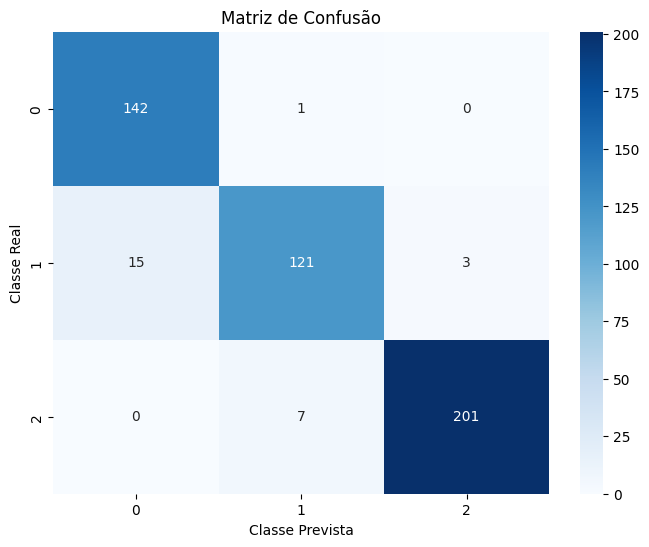

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       143
           1       0.94      0.87      0.90       139
           2       0.99      0.97      0.98       208

    accuracy                           0.95       490
   macro avg       0.94      0.94      0.94       490
weighted avg       0.95      0.95      0.95       490



In [ ]:
# Avaliar a acurácia
_, novo_accuracy = novo_classificador.evaluate(novo_previsores_teste, novo_classe_teste)
print(f"Acurácia no conjunto de teste: {novo_accuracy:.2f}")

# Previsões no conjunto de teste
novo_previsoes = novo_classificador.predict(novo_previsores_teste)
novo_previsoes_classes = np.argmax(novo_previsoes, axis=1)

# Matriz de confusão
novo_matriz_confusao = confusion_matrix(novo_classe_teste, novo_previsoes_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(novo_matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(novo_classe_teste, novo_previsoes_classes))


Resultado

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
# Implementação do DQN no ambiente MountainCar
env = make_vec_env('MountainCar-v0', n_envs=1)
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=50000)

# Avaliar o desempenho no ambiente
def avaliar_ambiente_dqn(model, env, episodios=100):
    melhor_recompensa = float('-inf')
    melhor_passos = float('inf')
    for _ in range(episodios):
        obs = env.reset()
        total_reward = 0
        passos = 0
        done = False
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)
            total_reward += reward
            passos += 1
        if total_reward > melhor_recompensa or (total_reward == melhor_recompensa and passos < melhor_passos):
            melhor_recompensa = total_reward
            melhor_passos = passos
    return melhor_recompensa, melhor_passos

# Executar a avaliação
melhor_recompensa, melhor_passos = avaliar_ambiente_dqn(model, env, episodios=100)
# Access the first element of the array using [0]
print(f"Melhor recompensa em {100} episódios: {melhor_recompensa[0]:.2f}")
print(f"Menor número de passos para alcançar o objetivo: {melhor_passos}")

# Função para gravar e exibir o vídeo da execução
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[-1]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display(HTML(data=f'''<video alt="test" autoplay
                              controls style="height: 400px;">
                              <source src="data:video/mp4;base64,{encoded.decode('ascii')}" type="video/mp4" />
                           </video>'''))
    else:
        print("Não foi possível encontrar o vídeo.")

# Finalizar e exibir o vídeo
env.close()
show_video()

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.848    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1177     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0496   |
|    n_updates        | 174      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.696    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1111     |
|    time_elapsed     | 1        |
|    total_timesteps  | 1600     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0019   |
|  